In [35]:
## import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

# Solve y = Theta * s for "s"
n = 5        # dimension of s
p = 2        # number of measurements, dim(y)

#a known matrix
Theta = np.random.randn(p,n)
print("Randomized Theta is : ")
print(Theta)
print("The shape of Theta is :", Theta.shape)
print("")

#known measurement...y is 200 dimensional 
y = np.random.randn(p) 
print("Randomized measurement 'y' is :")
print(y)
print("The shape of 'y' is: ", y.shape)
print("")

# solve for unknown vector "s"...s will be 1000 dimensional...
#system will be undetermined since y is too small to uniquely determine the solution "s"
#Dilemna comes in while chosing the "correct" s
#Method 1: Least square -> s = pseudoinverse of Theta * y   
# use SVD to compute theta: possible because each theta matrix will be invertible and diagonalizable
#however, this does not guarantee a sparse vector s

# L1 Minimum norm solution s_L1
def L1_norm(x):  #least absolute deviations (LAD) regression
    return np.linalg.norm(x,ord=1)


constr = ({'type': 'eq', 'fun': lambda x: Theta @x-y})   #we want theta(x-y) to be minimized 



print("Pseudoinverse of Theta: ")
print(np.linalg.pinv(Theta))
print("The shape of PseudoInverse of Theta is", np.linalg.pinv(Theta).shape)
print("")

print("Known measurement 'y' is: ")
print(y)
print("The shape of y is: ", y.shape)
print("")
            
s_L2 = np.linalg.pinv(Theta) @ y # initialize with L2 solution  #Least squares regression
print("Solution vector 's'(Multiplication of pseudoinverse of Theta * y) with respect to L2 norm is")
print(s_L2)
print("The shape of s_L2 is:", s_L2.shape)
print("")

#minimize s with respect to L1 s.t y = Theta*s
res = minimize(L1_norm, s_L2, method='SLSQP',constraints=constr) #SLSQP = Sequential Least Squares Programming
#print(res)


s_L1 = res.x
print("The solution vector 's' with respect to L1 norm is: ")
print(s_L1)


#print(Theta * s_L2)

Randomized Theta is : 
[[ 1.09516499 -0.67307715 -0.10758507  0.69174907  0.84114357]
 [ 0.3044633  -1.86353596 -0.06106957  0.2497857   0.39122789]]
The shape of Theta is : (2, 5)

Randomized measurement 'y' is :
[ 2.02797853 -1.10205039]
The shape of 'y' is:  (2,)

Pseudoinverse of Theta: 
[[ 0.54855806 -0.22337959]
 [ 0.21258786 -0.61013851]
 [-0.0436704   0.00805132]
 [ 0.32764377 -0.11547033]
 [ 0.36971203 -0.10139779]]
The shape of PseudoInverse of Theta is (5, 2)

Known measurement 'y' is: 
[ 2.02797853 -1.10205039]
The shape of y is:  (2,)

Solution vector 's'(Multiplication of pseudoinverse of Theta * y) with respect to L2 norm is
[ 1.35863954  1.103527   -0.09743559  0.79170865  0.86151352]
The shape of s_L2 is: (5,)

The solution vector 's' with respect to L1 norm is: 
[2.46245863e+00 9.93694005e-01 1.67282320e-06 1.36890167e-06
 1.42924977e-05]


/Users/sarahsyed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sarahsyed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


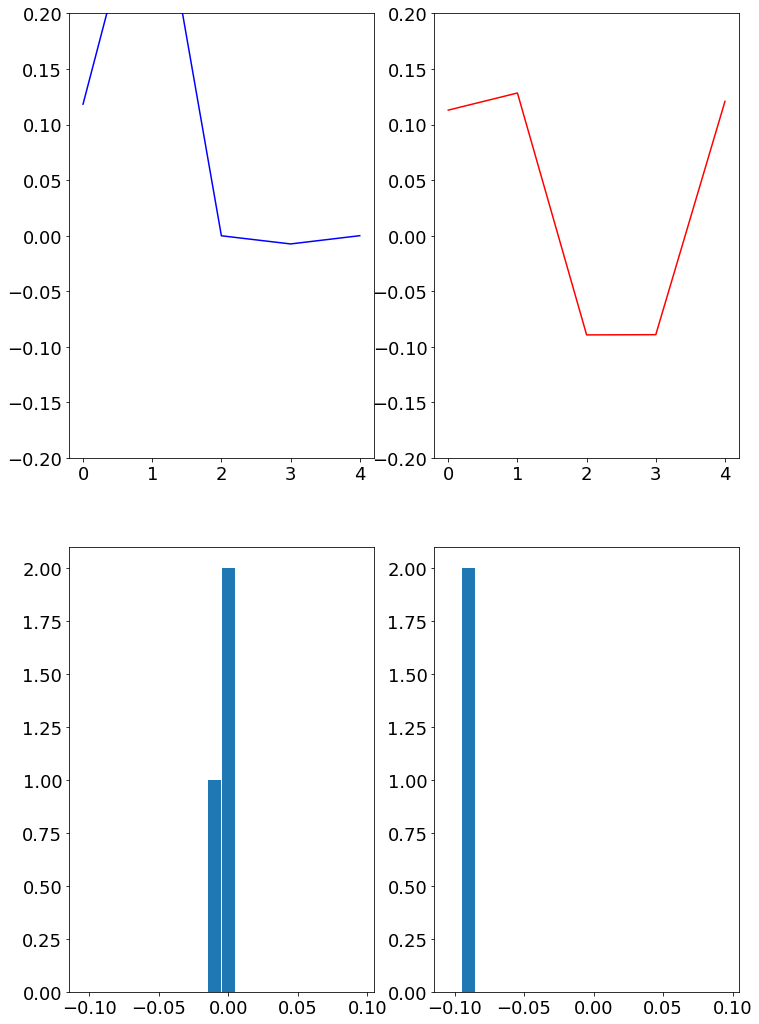

In [34]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1,color='b',LineWidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2,color='r',LineWidth=1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[3].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

plt.show()